# Calcul des forces de pression sur une digue

Une digue est un petit barrage permettant de retenir une étendue d'eau (mer, lac, rivière) par exemple pour protéger des habitations ou des installations en zone inondable. 

Dans ce mini-projet vous allez calculer numériquement les forces appliquées à une digue de forme arbitraire.

![Digue.png](./Digue.png)
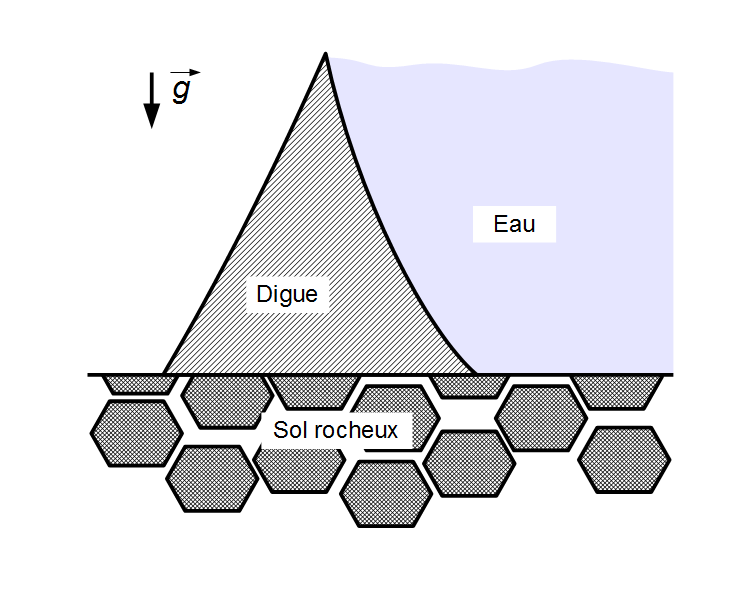

## Travail à la maison

La digue que nous allons modéliser est un bloc de béton (masse volumique : 3000 kg/m$^3$) posé sur le sol rocheux (coefficient de friction statique béton - roche : 0.5). D'un côté la digue retiens une masse d'eau de hauteur $H$, l'autre coté étant exposé à l'air. On prendra $H=10$ m dans toute la suite. 

Nous ferons l'hypothèse que l'interface entre le sol et la digue est étanche à l'eau mais pas à l'air. Cette hypothèse permettra de simplifier le calcul en ne considérant que les forces de pression due à la hauteur d'eau.

Pour simplifier, on se placera en deux dimensions (la digue est de longueur unitaire suivant l'axe perpendiculaire au schéma ci-dessus et on ne considérera pas les bords suivant cette direction).

a. Faites un bilan des forces appliquées à la digue en 2D. Quelle force permet à la digue de ne pas glisser sur le sol rocheux ?

b. Rappelez l'expression de la pression hydrostatique dans l'eau $P_{eau} (x)$ en fonction de la hauteur par rapport au sol $x$.

c. Justifiez que nous pouvons considérer dans l'expression précédente que la constante est la contribution de la pression de l'air. Considérons pour l'instant que le barrage est à sec, que pourrions nous dire sur la résultante des forces de pression de l'air sur la digue ? Rappelons ici que l'air peut s'imiscer entre la digue et le sol (indice : que peux-t-on dire de la poussée d'archimède de l'air sur un bloc de béton). Ce résultat est-il modifié si le barrage retiens une hauteur d'eau ? En déduire que l'on peux se réduire à calculer seulement les forces de pression de l'eau en utilisant l'expression $P_{eau} (x) = \rho_e g (H-x)$


d. Rappelez la (les) équation(s) d'équilibre statique de la digue.

### Modélisation

Pour considérer une digue de forme arbitraire, on modélisera les pentes coté air et coté eau par des fonctions mathématiques. Dans ce projet nous allons intégrer des fonctions suivant la direction donnée par l'axe vertical $y$. Il sera donc plus pratique de définir les pentes de la digue comme étant $x$ en fonction de $y$ (schéma ci-dessous).

![DigueSchema.png](./DigueSchema.png)
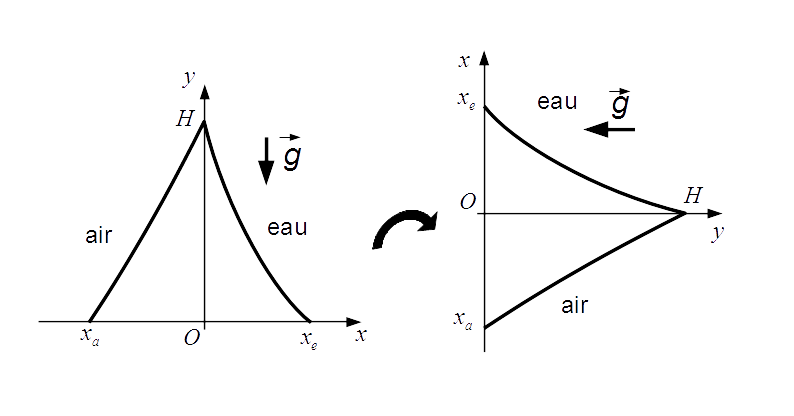


On définit donc :

* une fonction croissante $f_{air}(y)$ représentant l'interface air-béton définie pour $0 \leq y \leq H$ et allant de $x_a$ à $0$,
* une autre fonction décroissante $f_{eau}(y)$ représentant l'interface eau-béton définie sur le même intervalle et allant de $x_e$ à $0$. 

On ne considérera ici que des fonctions monotones.

On donne l'expression de la courbe coté eau pour une digue représentée par une fonction affine :

$$
f_{air}(y) = -\frac{x_a}{H}.(y-H)
$$

e. Donnez l'expression de la fonction coté air dans le cas d'une fonction affine, et tracez la avec le code suivant.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# ce code permet d'afficher les courbes représentant la digue

H=10
xa=-5
xe=+5


# on définit les fonctions coté eau et coté air, ici les courbes concaves
def fair(y):
    return -(y-H)*xa/H

def feau(y):
    return  ## A remplir

# on crée un tableau de y
y=np.linspace(0,H,1000)

# on trace
plt.plot(fair(y),y,'-b') 
#plt.plot(feau(y),y,'-b')  ## Décommenter après avoir codé la fonction feau(x)
 
plt.plot([xe,xa],[0,0],'-b') # bas de la digue
plt.xlabel('x (m)') 
plt.ylabel('y (m)')
plt.text(xe,8,'eau')
plt.text(xa,8,'air')
plt.axis('equal') # permet d'avoir un plot isométrique
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.xlim(-8,8)
plt.show()

## Travail en séance

On rappelle que les forces de pressions s'exercent perpendiculairement à la surface d'application. Il faut donc pouvoir trouver un vecteur normal à la tangente de ces deux fonctions en tout point, qui sera le vecteur directeur de la force de pression locale.

![DigueAngles.png](./DigueAngles.png)
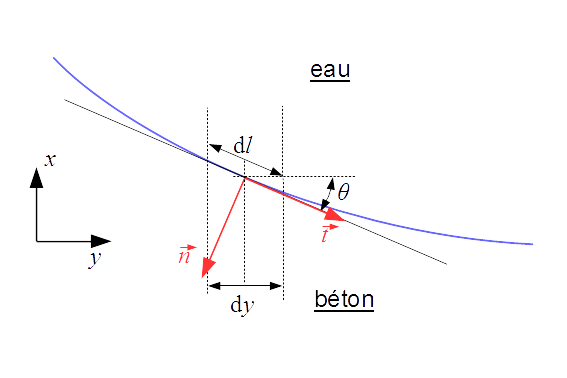

On rappelle que l'angle $\theta$ entre la tangente en un point et l'axe des abscisses (voir schéma ci-dessus) est relié à la dérivée de la courbe par :
$$
tan(\theta) = f'(y)
$$

Les vecteurs $\vec t$ et $\vec n$ sont alors donnés par :
$$
\vec t = \cos(\theta).\vec{u_y} + \sin(\theta).\vec{u_x}
$$
$$
\vec n = \sin(\theta).\vec{u_y} - \cos(\theta).\vec{u_x} 
$$


Pour pouvoir calculer la résultante des forces de pression sur une surface de forme arbitraire, il nous faut intégrer les forces infinitésimales $\vec{\mathrm{d}F}$ s'appliquant à chaque élément de surface $\mathrm{d}S$. Comme nous somme en deux dimensions, nous pouvons simplifier le problème en considérant que l'élément de surface est $\mathrm{d}S = L \mathrm{d}l$, avec $L = 1$ la longueur unitaire de la digue suivant $z$, ce qui nous ramène à une intégrale 1D (on n'écrira pas $L$ dans la suite).

On obtient donc, pour l'interfaces eau-béton :
$$
\vec{F} = \iint_S \vec{\mathrm{d}F} =\int_0^H P(y) \mathrm{d}l . \vec{n}
$$

avec $\vec{n}$ le vecteur normal rentrant au point de coordonnées $(f(y),y)$, et $\mathrm{d}l$ la longueur infinitésimale de la courbe pour une variation $\mathrm{d}x$. On montre facilement la relation avec l'angle $\theta$ définit avant :

$$
\mathrm{d}l = \frac{\mathrm{d}y}{\cos(\theta)}
$$

### Cas des digues en pentes droites

a. Calculez le volume de la digue par intégration de la largeur de la digue en fonction de $y$. Comparez avec le calcul analytique (ici, l'aire du triangle multiplié par la longueur $L=1$). En déduire la force de gravité exercée sur la digue.

b. Pour le cas des fonctions affines, calculez la résultante (vectorielle ! il y a une composante suivant $x$ et une composante suivant $y$) des forces de pression coté eau. On prendra $x_a = -5$, $x_e = +5$, $H=10$. (On ne cherchera pas à faire le calcul analytique !)

c. En supposant que la digue est en équilibre statique translationnel, calculez avec le principe fondamental de la dynamique les deux composantes (normale et tangentielle) de la force de réaction du sol, puis le rapport de ces composantes $T/N$. En considérant le coefficient de frottement roche/béton de 0.5, la digue est-elle en équilibre translationnel ?

d. Reprenez le calcul du rapport $T/N$ et du volume de béton en imposant $x_a=-5$ et $x_e=0$. La digue est-elle stable ? (il sera utile d'écrire une fonction résumant les calculs des questions a. b. c.).

e. Reprenez le calcul avec $x_a=0$ et $x_e=+5$. Que constatez-vous ? Expliquez pourquoi la digue est stable dans un cas mais pas l'autre.

### Cas des digues convexes

On considère maintenant que l'interface entre l'eau et le béton n'est plus une fonction affine mais une fonction de la forme :
$$
f_{eau} (y)=a \left(\frac{y}{H}\right)^2-(a+x_e)\left(\frac{y}{H}\right) +x_e
$$


on donne également la dérivée :

$$
f'_{eau} (y)=\frac{2a}{H^2}-\frac{a+x_e}{H}
$$

(on peut vérifier aisément que cette fonction relie bien les points de coordonées $[x_e,0]$ et $[0,H]$). Dans la suite nous prendrons $a=3$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# ce code permet d'afficher les courbes représentant la digue

H=10
xe=5
xa=0

# on définit les fonctions coté eau et coté air, ici les courbes concaves
a=3
def feau(y):
    return a*(y/H)**2-(a+xe)*(y/H)+xe
def fair(y):
    return (H-y)*xa/H

# on crée un tableau de y
y=np.linspace(0,H,1000)

# on trace
plt.plot(feau(y),y,'-b')
plt.plot(fair(y),y,'-b')
plt.plot([xe,xa],[0,0],'-b')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.text(3,8,'eau')
plt.text(-3,8,'air')
plt.axis('equal') # permet d'avoir un plot isométrique
plt.axhline(0, color="black")
#plt.axvline(0, color="black")
plt.xlim(-8,8)
plt.show()

e. Calculez, pour $a=3$, $x_a=0$ et $x_e=5$, la résultante des forces de pression, le volume de béton, et le rapport $T/N$ dans l'hypothèse de l'équilibre statique. La digue est-elle en équilibre translationnel ?

f. Reprenons le calcul avec $x_e=6$. La digue est-elle en équilibre ? Comparez avec le cas de la pente affine avec $x_a=0$ et $x_e=5$ ? Laquelle est la plus favorable ?

g. Utilisez une boucle pour calculer le volume et le rapport $T/N$ pour en faisant varier $x_e$ dans l'intervalle $[5,6]$. On pourra ainsi tracer le rapport $T/N$ en fonction du volume. Déterminez graphiquement le volume minimal pour garder le rapport $T/N$ inférieur à 0.5 dans le cas courbe.

h. Expliquez pourquoi la forme courbe de l'interface aide à réduire le volume de béton nécessaire à garder la digue en équilibre.

## Parenthèse

Nous avons ici omis la deuxième équation d'équilibre statique : le théorème du moment cinétique (ou équilibre du moment des forces dans le cas statique).

Pour vérifier que la digue ne bascule pas sous la pression de l'eau, il faudrait en effet vérifier que le moment des forces qui s'applique à la digue soit nul.

Pour cela, il faudrait :

- trouver le point d'application du poids (le centre de gravité de la digue),
- calculer le moment du poids par rapport à un point,
- calculer la résultante du moment des forces de pression par rapport au même point,
- trouver le point d'application de la réaction du sol qui annule la somme des moments des forces (par rapport à un point quelconque) 
- vérifier que ce point d'application est bien situé quelque part entre la digue et le sol (sinon la digue bascule...)


